In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

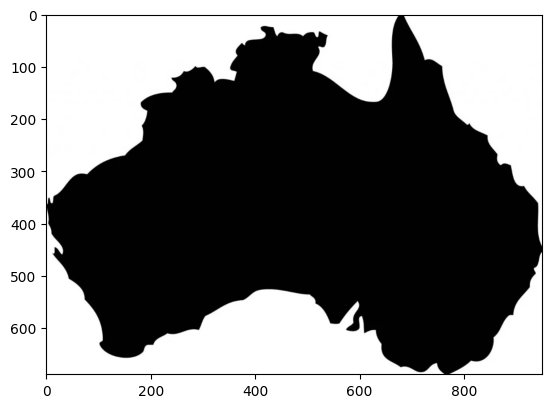

In [ ]:
cv_image = cv2.imread("Australia.png")
plt.imshow(cv_image)
plt.show()

In [ ]:
import math
print(cv_image.shape)
print(cv_image.shape[0] * cv_image.shape[1] / 50) # площадь шестиугольника S = 3 * sqrt(3) * a^2 / 2
S = cv_image.shape[0] * cv_image.shape[1] / 50
a = round(math.sqrt(S * 2 / (3 * math.sqrt(3))))
print(a)

(689, 950, 3)
13091.0
71


In [ ]:
import random
epsilon = 0.001

def get_triangle_area(x1, y1, x2, y2, x3, y3) -> float:
    return abs((x1 - x3) * (y2 - y3) + (x2 - x3) * (y3 - y1))


def is_point_in_triangle(x1, y1, x2, y2, x3, y3, x_point, y_point):
    tr_area = get_triangle_area(x1, y1, x2, y2, x3, y3)  # Площадь основного треугольника

    tr_area2 = get_triangle_area(x1, y1, x2, y2, x_point, y_point)  # Площади треугольника, образованного из 2 точек основного
    tr_area3 = get_triangle_area(x1, y1, x_point, y_point, x3, y3)  # и точки, которая проверяется на принадлежность
    tr_area4 = get_triangle_area(x2, y2, x_point, y_point, x3, y3)  # к треугольнику

    # Если площади образованных треугольников равны, то точка в треугольнике
    return abs(tr_area - tr_area2 - tr_area3 - tr_area4) <= epsilon

def is_point_in_hexagon(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, x_point, y_point):
  res1 = is_point_in_triangle(x1, y1, x2, y2, x3, y3, x_point, y_point)
  res2 = is_point_in_triangle(x2, y2, x3, y3, x4, y4, x_point, y_point)
  res3 = is_point_in_triangle(x3, y3, x4, y4, x5, y5, x_point, y_point)
  res4 = is_point_in_triangle(x4, y4, x5, y5, x6, y6, x_point, y_point)
  res5 = is_point_in_triangle(x5, y5, x6, y6, x1, y1, x_point, y_point)
  res6 = is_point_in_triangle(x1, y1, x3, y3, x6, y6, x_point, y_point)
  res7 = is_point_in_triangle(x5, y5, x3, y3, x6, y6, x_point, y_point)
  return (res1 or res2 or res3 or res4 or res5 or res6 or res7)

def MonteCarlo(circles, x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, treshold):
  min_x = min(x1, x2, x3, x4, x5, x6)
  max_x = max(x1, x2, x3, x4, x5, x6)
  min_y = min(y1, y2, y3, y4, y5, y6)
  max_y = max(y1, y2, y3, y4, y5, y6)

  if (min_x < 0):
    return False
  if (min_y < 0):
    return False
  if (max_x < 0):
    return False
  if (max_y < 0):
    return False

  if (min_x >= cv_image.shape[0]):
    return False
  if (min_y >= cv_image.shape[1]):
    return False

  if (max_x >= cv_image.shape[0]):
    return False
  if (max_y >= cv_image.shape[1]):
    return False
  cnt = 0

  for i in range(0, circles):
    random.seed(2 * i + 1)
    x = random.randint(min_x, max_x)
    y = random.randint(min_y, max_y)

    if (is_point_in_hexagon(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, x, y)):
      if (cv_image[x][y] == np.array([1, 1, 1])).all() == True:
        cnt += 1
  if cnt == 0 :
    return False
  if cnt * 1. / circles >= treshold:
    return True

  return False

In [ ]:
from PIL import Image, ImageDraw
import numpy as np
image = Image.open("Australia.png")
hexagons_coordinates = []

def draw_hexagonal_grid_on_image(image, rows, cols, size):
    draw = ImageDraw.Draw(image)
    hexagon = np.array([
        [np.cos(np.pi/3 * i) * size, np.sin(np.pi/3 * i) * size]
        for i in range(6)
    ])

    for row in range(rows):
        for col in range(cols):
            x_offset = 3/2 * size * col
            y_offset = np.sqrt(3) * size * (row + 0.5 * (col % 2))
            hexagon_translated = hexagon + [x_offset, y_offset]
            hexagon_translated = [(int(x), int(y)) for x, y in hexagon_translated]

            if (hexagon_translated[0][0] < 0 or hexagon_translated[0][0] > cv_image.shape[1] or
                hexagon_translated[1][0] < 0 or hexagon_translated[1][0] > cv_image.shape[1] or
                hexagon_translated[2][0] < 0 or hexagon_translated[2][0] > cv_image.shape[1] or
                hexagon_translated[3][0] < 0 or hexagon_translated[3][0] > cv_image.shape[1] or
                hexagon_translated[4][0] < 0 or hexagon_translated[4][0] > cv_image.shape[1] or
                hexagon_translated[5][0] < 0 or hexagon_translated[5][0] > cv_image.shape[1] or

                hexagon_translated[0][1] < 0 or hexagon_translated[0][1] > cv_image.shape[0] or
                hexagon_translated[1][1] < 0 or hexagon_translated[1][1] > cv_image.shape[0] or
                hexagon_translated[2][1] < 0 or hexagon_translated[2][1] > cv_image.shape[0] or
                hexagon_translated[3][1] < 0 or hexagon_translated[3][1] > cv_image.shape[0] or
                hexagon_translated[4][1] < 0 or hexagon_translated[4][1] > cv_image.shape[0] or
                hexagon_translated[5][1] < 0 or hexagon_translated[5][1] > cv_image.shape[0]) :
                continue

            if (MonteCarlo(10000, hexagon_translated[0][1],hexagon_translated[0][0],
                           hexagon_translated[1][1],hexagon_translated[1][0],
                           hexagon_translated[2][1],hexagon_translated[2][0],
                           hexagon_translated[3][1],hexagon_translated[3][0],
                           hexagon_translated[4][1],hexagon_translated[4][0],
                           hexagon_translated[5][1],hexagon_translated[5][0], 0.5)):

                draw.polygon(hexagon_translated, outline="red")
                hexagons_coordinates.append(hexagon_translated)


    return image

new_image = draw_hexagonal_grid_on_image(image.copy(), rows=20, cols=20, size=a)



In [ ]:
coordinates = []
for i in range(0, len(hexagons_coordinates)):
  new_line = []
  for j in range(0, 6):
    new_line.append((hexagons_coordinates[i][j][1], hexagons_coordinates[i][j][0]))
  coordinates.append(new_line)

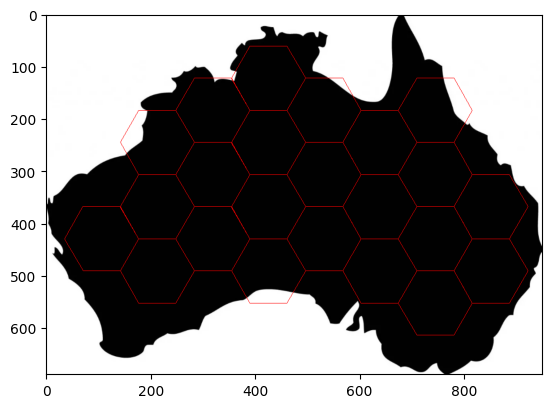

In [ ]:
new_image.save("output_image.jpg")

plt.imshow(new_image)
plt.show()

In [ ]:
from scipy import integrate
import ipywidgets as ipw

In [ ]:
def derivative(X, t, alpha0, omega, beta, c, gamma):
    x, y = X
    #print(type(t))
    dotx = x * (alpha0 * (1 + math.sin(omega * t)) - y)
    doty = y * (-c + beta * x)
    return np.array([dotx, doty])

In [ ]:
max_dx2 = []

def RK3(func, X0, t_array, alpha0, omega,  beta, c, gamma):
    """
    Runge Kutta 3 solver.
    """
    dt = t_array[1] - t_array[0]
    nt = len(t_array)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):

        k1 = func(X[i], t_array[i], alpha0, omega, beta, c, gamma)
        #print(type(k1))
        k2 = func(X[i] + k1/2. * dt, t_array[i] + dt/2., alpha0, omega, beta, c, gamma)
        k3 = func(X[i] - k1 * dt + 2 * dt * k2, t_array[i] + dt, alpha0, omega, beta, c, gamma)

        X[i+1] = X[i] + dt / 6. * (k1 + 4. * k2 + k3)
        k4 = func(X[i+1], t_array[i] + dt, alpha0, omega, beta, c, gamma)
        max_dx2.append(abs(k4 - k3) * dt ** 2)
    return X


Text(0.5, 1.0, 'Phase plane : Victims vs Predators (RK3)')

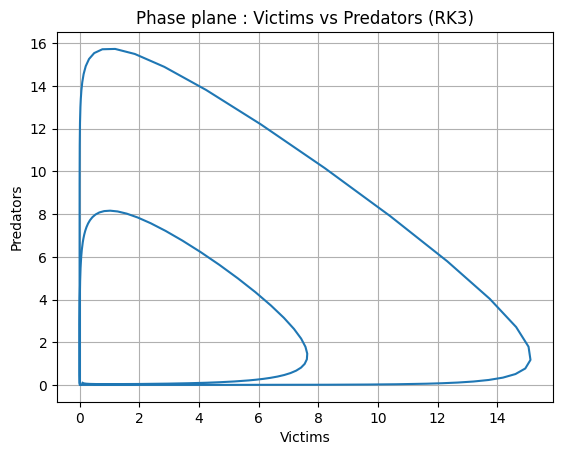

In [ ]:
alpha0 = 1. #mortality rate due to predators
beta = 1.
delta = 1.
gamma = 1.
x0 = 0.1
y0 = 0.1
Nt = 1000
tmax = 30.
t_array = np.linspace(0.,tmax, Nt)

res = RK3(derivative, (x0, y0), t_array, alpha0=alpha0, beta=beta, c=delta, gamma = gamma, omega=1)
plt.figure()
plt.plot(res[:, 0], res[:, 1], "-")
plt.xlabel("Victims")
plt.ylabel("Predators")
plt.grid()
plt.title("Phase plane : Victims vs Predators (RK3)")

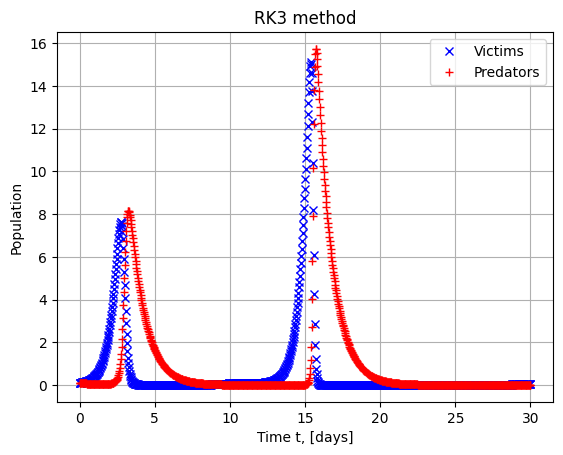

In [ ]:
plt.figure()
plt.grid()
plt.title("RK3 method")
plt.plot(t_array, res[:, 0], 'xb', label = 'Victims')
plt.plot(t_array, res[:, 1], '+r', label = "Predators")
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show()

In [ ]:
res[0]

array([0.1, 0.1])

In [ ]:
res[1]

array([0.10279002, 0.09733753])

In [ ]:
res[2]

array([0.10576149, 0.09475413])

Разностная схема РК - отрезок с 4 точками.
x_n x_n+dt/2 x_n+dt/2 x_n

Спросить про шаблон!

# Погрешности

In [ ]:
x_error = []
y_error = []
for i in range(0, len(max_dx2)):
  x_error.append(max_dx2[i][0])
  y_error.append(max_dx2[i][1])

max_x_error = max(x_error)
max_y_error = max(y_error)
print(max_x_error, max_y_error)

0.00032959843883315835 0.00047287981651159087


In [ ]:
dt = tmax * 1. / Nt
print(max_x_error, max_y_error)

0.00032959843883315835 0.00047287981651159087


In [ ]:
print(max_x_error * Nt, max_y_error * Nt)

0.32959843883315837 0.4728798165115909


In [ ]:
eps = 0.00000000000000000000000000000000000000001
while eps + 1.0 == 1.:
  eps *= 10

In [ ]:
print(eps / dt + max_x_error * Nt, eps / dt + max_y_error * Nt)

0.3295984388331917 0.4728798165116242
